In [1]:
import numpy as np
import pandas as pd
import multiprocessing as mp
from inspect import signature
from matplotlib import pyplot as plt
from plotting import plot_performance_over_time, plot_final_performance_comparison, plot_improvement_probability, plot_configuration_footprint, plot_hp_importance

In [2]:
# Let's generate some exmaple data fist:
df = pd.DataFrame(np.random.randint(0,4,size=(500, 6)), columns=["time", "performance", "Method", "Benchmark", "Dimension", "seed"])

## The Basics

These are the standard plotting functions we implement:
    - performance over time plots
    - configuration footprints with deepcave
    - hyperparameter iportance with deepcave
    - final performance comparison plots with rliable

Below you see them in action with randomly generated data.

/Users/theeimer/Documents/git/automl_repo_template/{{cookiecutter.project_slug}}/{{cookiecutter.project_slug}}/plotting.py:207: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.lineplot(data=data, x=x, y=y, ax=ax, marker=marker, hue=hue, errorbar=errorbar, estimator=aggregation,palette=sns.color_palette('colorblind', as_cmap = True))
/Users/theeimer/Documents/git/automl_repo_template/{{cookiecutter.project_slug}}/{{cookiecutter.project_slug}}/plotting.py:212: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim)


<Signature (data: pandas.core.frame.DataFrame, x: str, y: str, hue: str = None, marker: str = None, col: str = None, row: str = None, logx: bool = False, logy: bool = False, xlim: Tuple = None, ylim: Tuple = None, errorbar: str = 'ci', xlabel: str = None, ylabel: str = None, aggregation: str = <function mean at 0x1098b19b0>, save_path: str = None)>

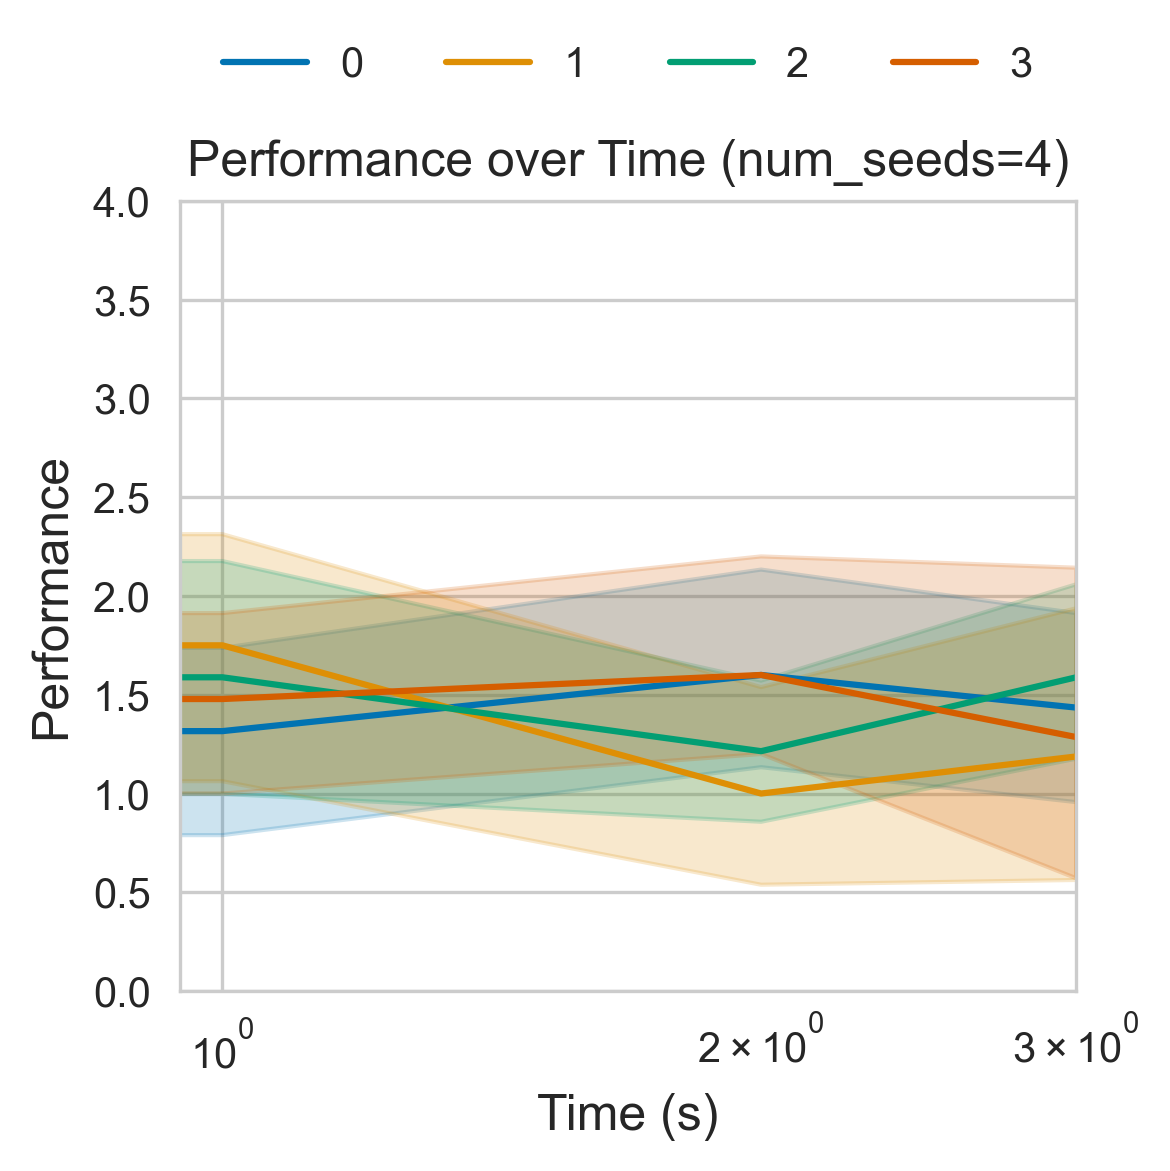

In [3]:
# First: simple performance over time
# You have different options for aggregation (mean, median, iqm) and confidence interval (std, ci, se)
plot_performance_over_time(df, x="time", y="performance", hue="Method", aggregation="iqm", logx=True, xlabel="Time (s)", ylabel="Performance", ylim=(0,4))

# This is the full set of arguments:
signature(plot_performance_over_time)

{1: array([[0, 1, 3, 3, 3, 0, 3, 2, 0, 0, 1, 1, 3, 0, 1, 3, 3, 2, 2, 1, 0, 1,
        1, 3, 0],
       [2, 1, 1, 0, 0, 3, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 3, 3, 2, 3, 3, 0,
        0, 1, 2],
       [0, 1, 3, 0, 0, 2, 3, 0, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2, 3,
        3, 2, 0],
       [3, 2, 0, 0, 3, 1, 2, 3, 0, 1, 0, 3, 0, 2, 3, 2, 1, 3, 0, 3, 2, 1,
        0, 0, 2]]), 0: array([[3, 3, 3, 1, 1, 2, 1, 2, 0, 2, 2, 3, 0, 2, 0, 3, 2, 2, 3, 1, 3, 1,
        0, 0, 0, 1, 2],
       [3, 2, 0, 0, 2, 2, 3, 1, 2, 2, 0, 0, 1, 3, 0, 0, 3, 2, 3, 3, 2, 0,
        2, 0, 0, 3, 1],
       [1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 3, 0, 3, 1, 0, 3, 3, 3, 3, 2, 2,
        1, 1, 0, 3, 3],
       [0, 3, 2, 1, 3, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 2, 3, 3, 0, 2, 1, 2,
        1, 1, 3, 1, 2]]), 3: array([[2, 2, 2, 1, 2, 3, 3, 2, 2, 2, 0, 3, 1, 3, 1, 0, 3, 1, 2, 2, 0, 2,
        0],
       [1, 3, 0, 1, 2, 2, 2, 0, 3, 3, 0, 1, 1, 3, 1, 3, 0, 3, 3, 3, 2, 3,
        1],
       [2, 1, 0, 2, 1, 0, 1, 0, 2, 3, 1, 3, 0, 2, 1, 3

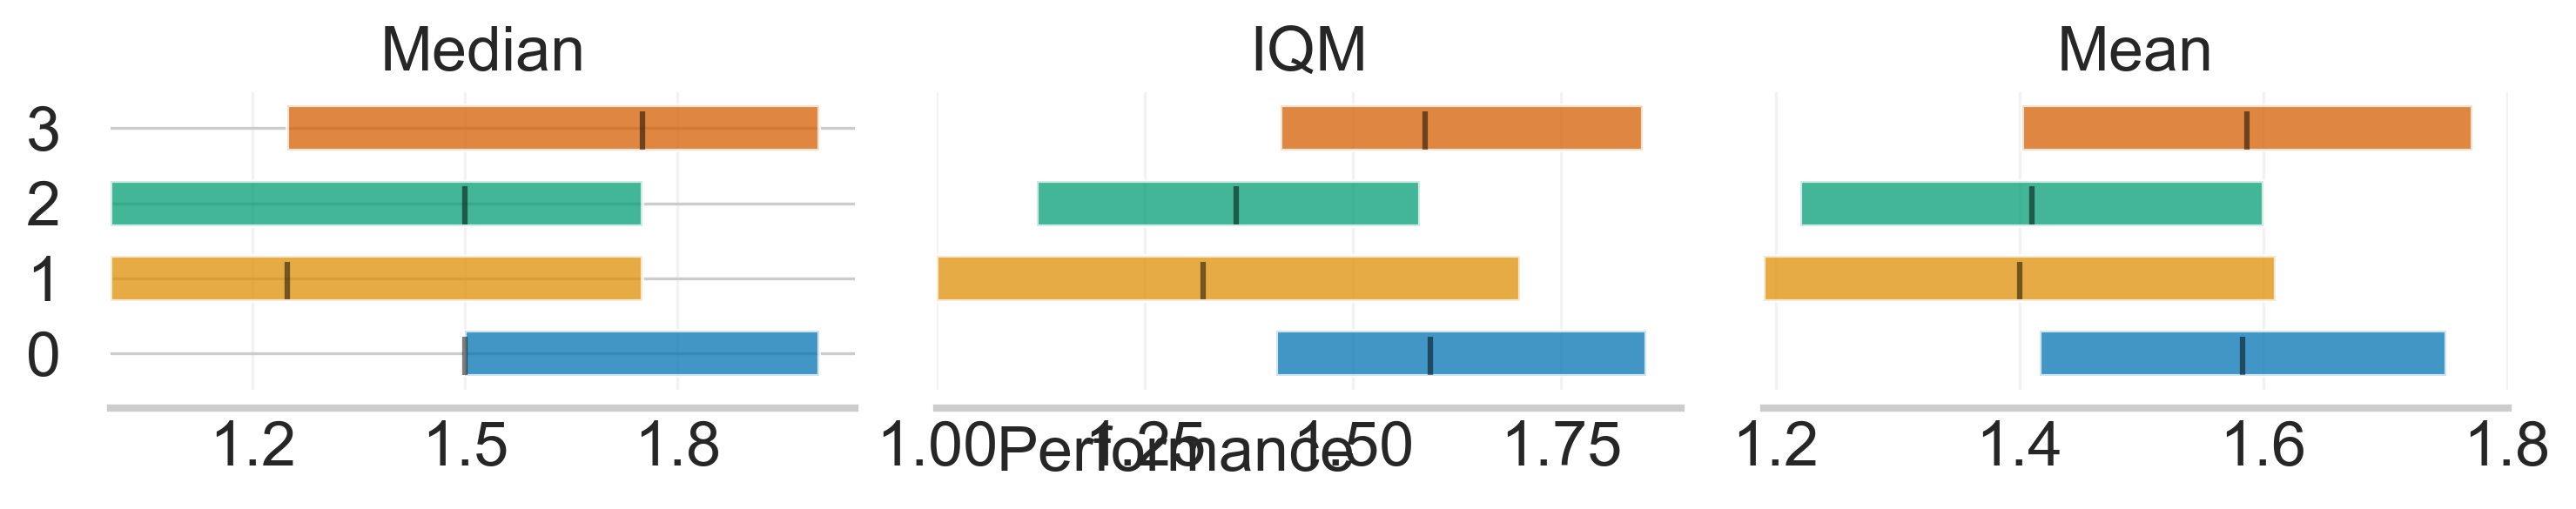

In [4]:
# If you only want a comparison of final performance, you can specify which metrics to aggregate over and get a result like this:
plot_final_performance_comparison(df, x="Method", y="performance", aggregation=["mean", "median", "iqm"], xlabel="Performance")
print("Three performance metrics aggregated over all seeds")

In [6]:
# Similarly, you can also plot the probability that one method will outperform another at the end of your evaluation:
plot_improvement_probability(df, x="Method", y="performance")

IndexError: tuple index out of range

In [ ]:
# If you want to plot the configuration footprint, you can do so like this:

In [ ]:
# And the function for hyperparameter importance looks very similar:

# Multiple Plots with Grids

All the basic plots can also be turned into grids by simply specifying the parameter(s) you'd like in your rows and columns.

In [ ]:
plot_performance_over_time(df, "time", "performance", aggregation="median", col="Benchmark", row="Dimension", hue="Method", logx=True, xlabel="Time (s)", ylabel="Performance")
print("Multiplot with col and row")

# Multiprocessing for Many Plots

If grids take too long for your data, you can instead use multiprocessing to parallelize them. Here's an example with a similar result as above:

In [ ]:
processes = 4
data_splits = []
for dim in df["Dimension"].unique():
    for bench in df["Benchmark"].unique():
        data_splits.append(df[(df["Dimension"] == dim) & (df["Benchmark"] == bench)])
with mp.Pool(processes=processes) as pool:
    images = [pool.apply(plot_performance_over_time, kwds={"data":df, "x": "time", "y": "performance", "aggregation": "iqm", "hue": "Method"}) for df in data_splits]

In [ ]:
# Now we have to recompose the image
rows = len(df["Dimension"].unique())
columns = len(df["Benchmark"].unique())
fig = plt.figure(figsize=(20, 20))
for i, img in enumerate(images):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
    plt.axis('off')
fig.tight_layout()
plt.show()